# Simple code

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the data
train = pd.read_csv('./playground-series-s3e4/train.csv')
test = pd.read_csv('./playground-series-s3e4/test.csv')

# Explore the data
print(train.head())
print(train.describe())

   id  Time        V1        V2        V3        V4        V5        V6  \
0   0   0.0  2.074329 -0.129425 -1.137418  0.412846 -0.192638 -1.210144   
1   1   0.0  1.998827 -1.250891 -0.520969 -0.894539 -1.122528 -0.270866   
2   2   0.0  0.091535  1.004517 -0.223445 -0.435249  0.667548 -0.988351   
3   3   0.0  1.979649 -0.184949 -1.064206  0.120125 -0.215238 -0.648829   
4   4   0.0  1.025898 -0.171827  1.203717  1.243900 -0.636572  1.099074   

         V7        V8  ...       V21       V22       V23       V24       V25  \
0  0.110697 -0.263477  ... -0.334701 -0.887840  0.336701 -0.110835 -0.291459   
1 -1.029289  0.050198  ...  0.054848 -0.038367  0.133518 -0.461928 -0.465491   
2  0.948146 -0.084789  ... -0.326725 -0.803736  0.154495  0.951233 -0.506919   
3 -0.087826 -0.035367  ... -0.095514 -0.079792  0.167701 -0.042939  0.000799   
4 -0.938651  0.569239  ...  0.099157  0.608908  0.027901 -0.262813  0.257834   

        V26       V27       V28  Amount  Class  
0  0.207733 -0.0765

In [5]:
X = train.drop(columns=['Class', 'id'])
y = train['Class']
# train.head()

In [6]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create a model and fit it to the training data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Make predictions on the validation set
y_val_pred = model.predict_proba(X_val)[:, 1]

# Evaluate the model
print("Validation AUC-ROC: ", roc_auc_score(y_val, y_val_pred))

Validation AUC-ROC:  0.7229974436386539


In [9]:
# Prepare the test data
test_data = test.drop(columns=['id'])

# Make predictions on the test data
test_pred = model.predict_proba(test_data)[:, 1]

# Prepare a submission file
submission = pd.DataFrame({'id': test['id'], 'Class': test_pred})
submission.to_csv('submission.csv', index=False)

# Better Performance

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import tkinter
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler



# Load the data
train_data_raw = pd.read_csv('./playground-series-s3e4/train.csv', index_col='id')
test_data_raw = pd.read_csv('./playground-series-s3e4/test.csv', index_col='id')

In [23]:
train_data_raw.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,...,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,-0.048337,...,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,0.002140
std,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,1.054143,...,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,0.046214
min,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,-8.756951,...,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000,0.000000
25%,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,-0.711444,...,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,0.000000
50%,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,-0.131323,...,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,0.000000
75%,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,0.583715,...,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,0.000000
max,120580.000000,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,13.423914,...,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000,1.000000


In [24]:
test_data_raw.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,...,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000,146087.000000
mean,144637.928166,0.512929,-0.013098,-0.697478,-0.273258,0.321856,-0.050204,0.073419,0.043803,-0.071620,...,-0.056678,0.044729,0.175461,0.018471,0.016029,-0.118352,-0.015199,0.006236,0.002035,66.182463
std,14258.025396,1.628455,1.247749,1.292522,1.365752,1.146215,1.332880,0.946681,0.749513,0.924996,...,0.458364,0.449017,0.710704,0.359597,0.633929,0.479720,0.446154,0.255935,0.174613,153.151535
min,120580.000000,-34.755944,-37.803827,-18.934952,-5.497560,-25.639591,-14.133040,-18.715915,-26.926164,-4.823352,...,-26.412867,-13.087263,-5.392649,-12.814296,-2.789084,-3.361564,-1.743223,-9.412538,-8.262339,0.000000
25%,132698.000000,-0.679988,-0.715885,-1.619268,-1.021205,-0.418547,-0.891441,-0.570042,-0.231824,-0.634695,...,-0.237529,-0.166715,-0.393667,-0.135059,-0.368957,-0.409938,-0.284914,-0.066037,-0.057447,5.990000
50%,144493.000000,0.285798,0.009058,-0.719060,-0.482945,0.306851,-0.372813,0.118545,0.014979,-0.075909,...,-0.096729,0.058393,0.250169,0.017835,0.029727,-0.142325,-0.069342,-0.003539,-0.026955,21.790000
75%,156140.000000,1.974015,0.827420,0.073874,0.369725,0.955997,0.302724,0.734503,0.296969,0.513770,...,0.065753,0.244817,0.749555,0.167514,0.562138,0.182937,0.216632,0.069334,0.066954,66.000000
max,172790.000000,2.452901,12.390128,4.492640,11.232928,24.352818,16.596635,27.023955,12.098322,7.888980,...,15.829261,15.333546,5.771245,17.481609,4.541724,4.555960,3.374748,12.673968,13.093229,4630.600000


In [26]:
# Removing 'Time' column
train_data = train_data_raw.drop('Time', axis=1)
test_data = test_data_raw.drop('Time', axis=1)

<ipython-input-58-108b85937421>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  num_features_fig.show()


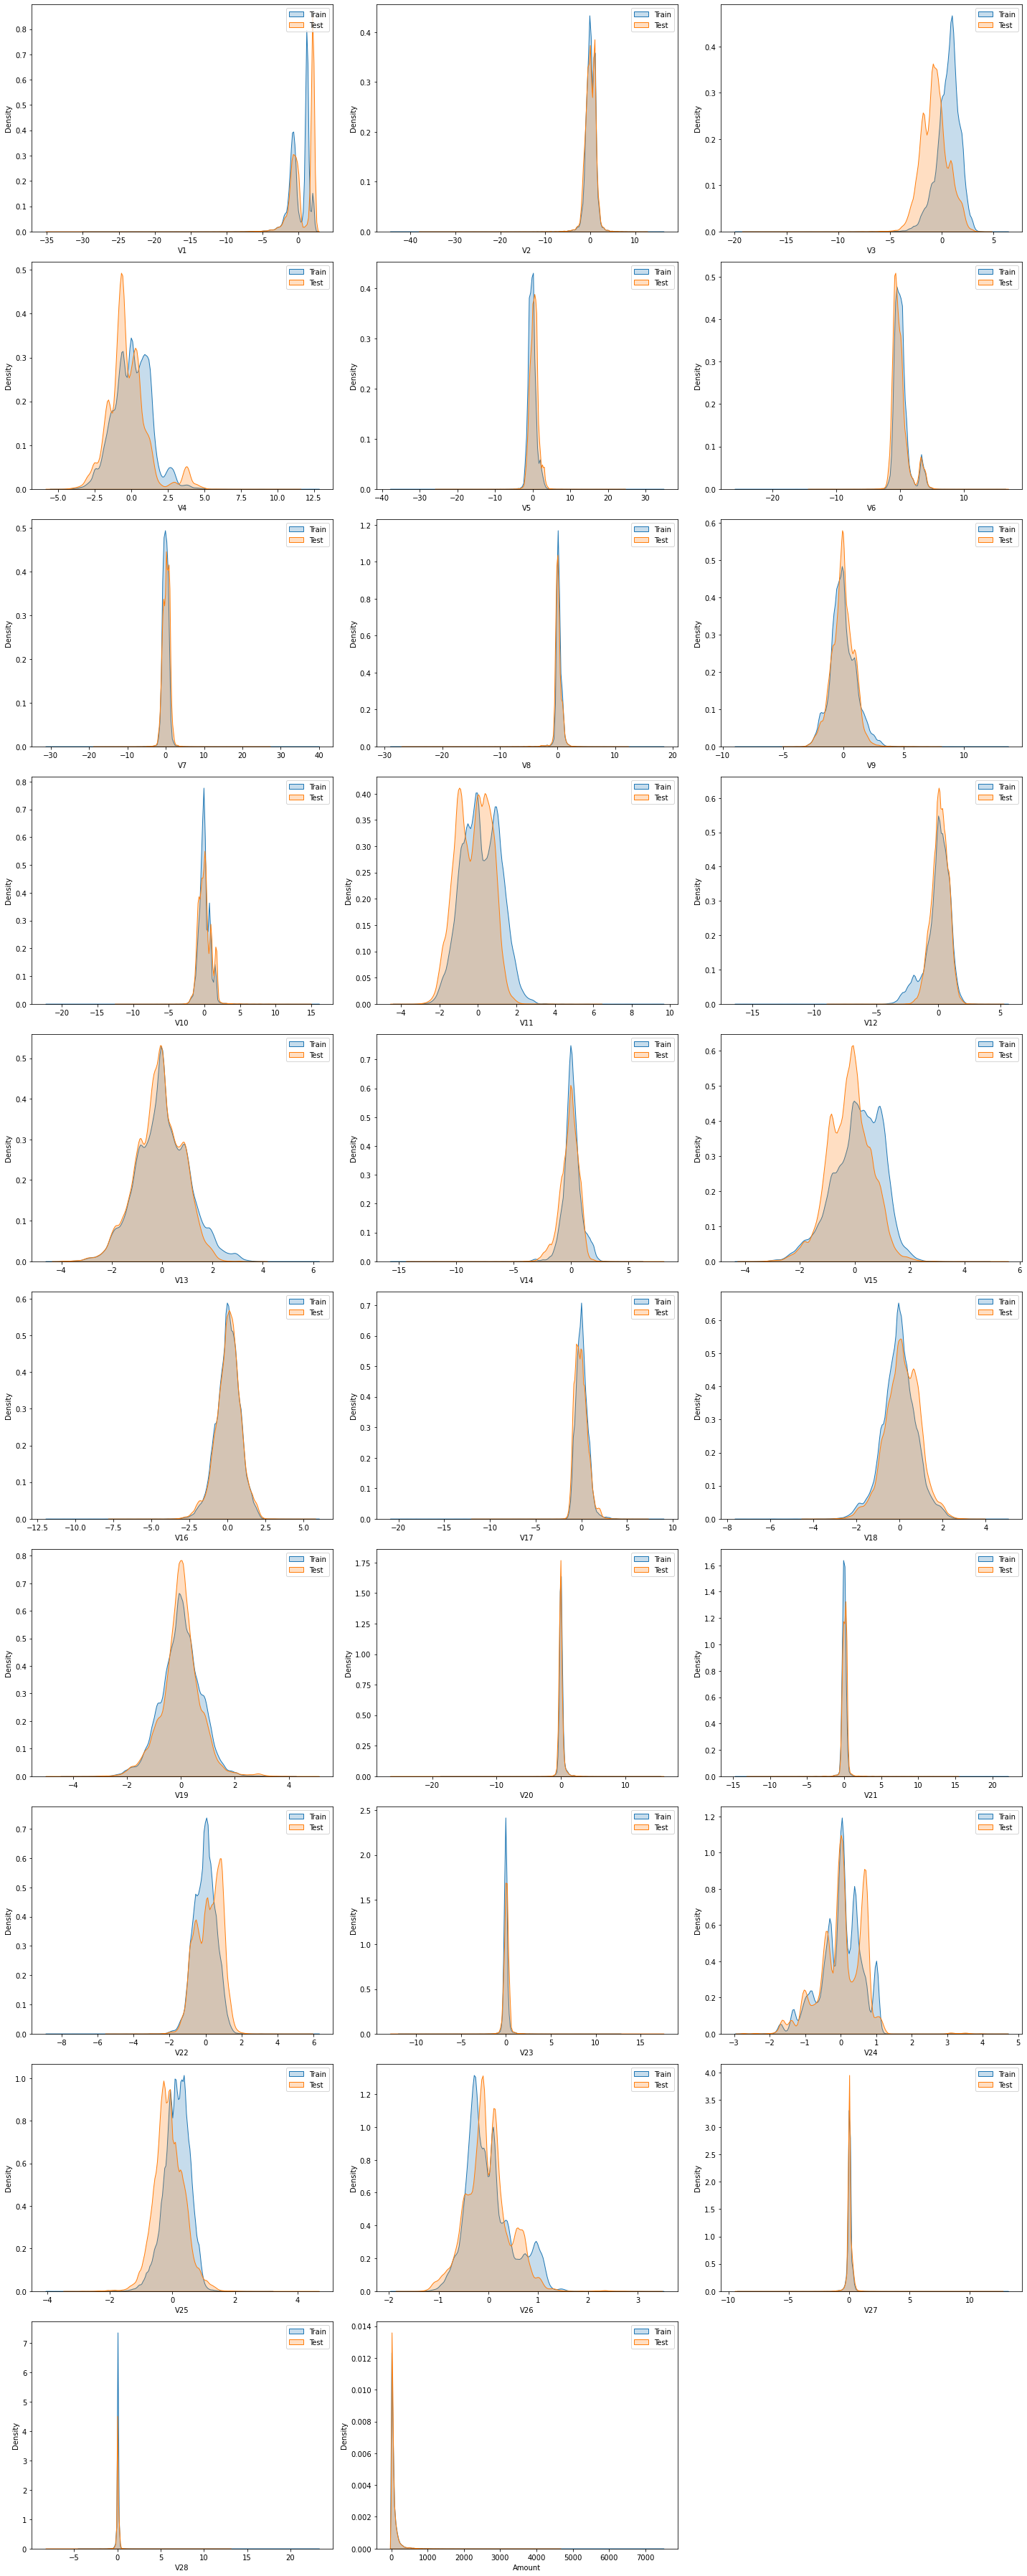

In [58]:
# Visualizing distribution of features
num_features = list(train_data.loc[:, :'Amount'])
num_features_fig = plt.figure(figsize=(20, 50))
for idx, feature in enumerate(num_features[:30]):
    ax = num_features_fig.add_subplot(10, 3, idx+1)
    sns.kdeplot(x = feature, fill = True, data = train_data, label = "Train")
    sns.kdeplot(x = feature, fill = True, data = test_data, label = "Test")
    ax.set_xlabel(feature)
    ax.legend()
num_features_fig.tight_layout()
num_features_fig.show()

<ipython-input-70-91d8ca2932a9>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  imbalance_fig.show()


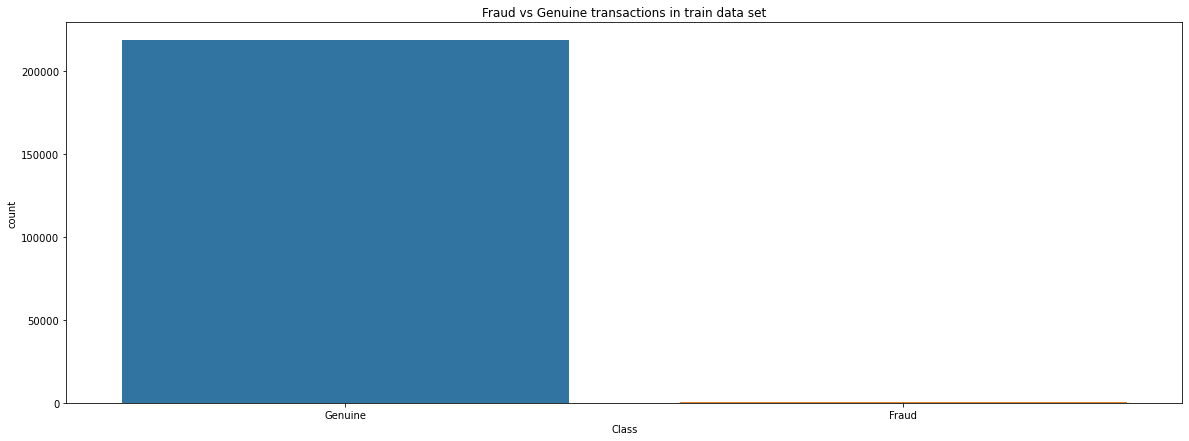

In [70]:
# Checking for class imbalance
imbalance_fig, imbalance_axes = plt.subplots(1, 1, figsize=(20,7))
sns.countplot(data=train_data, x='Class', ax=imbalance_axes)
imbalance_axes.set_title('Fraud vs Genuine transactions in train data set')
imbalance_axes.set_xticklabels(['Genuine','Fraud'])


imbalance_fig.show()

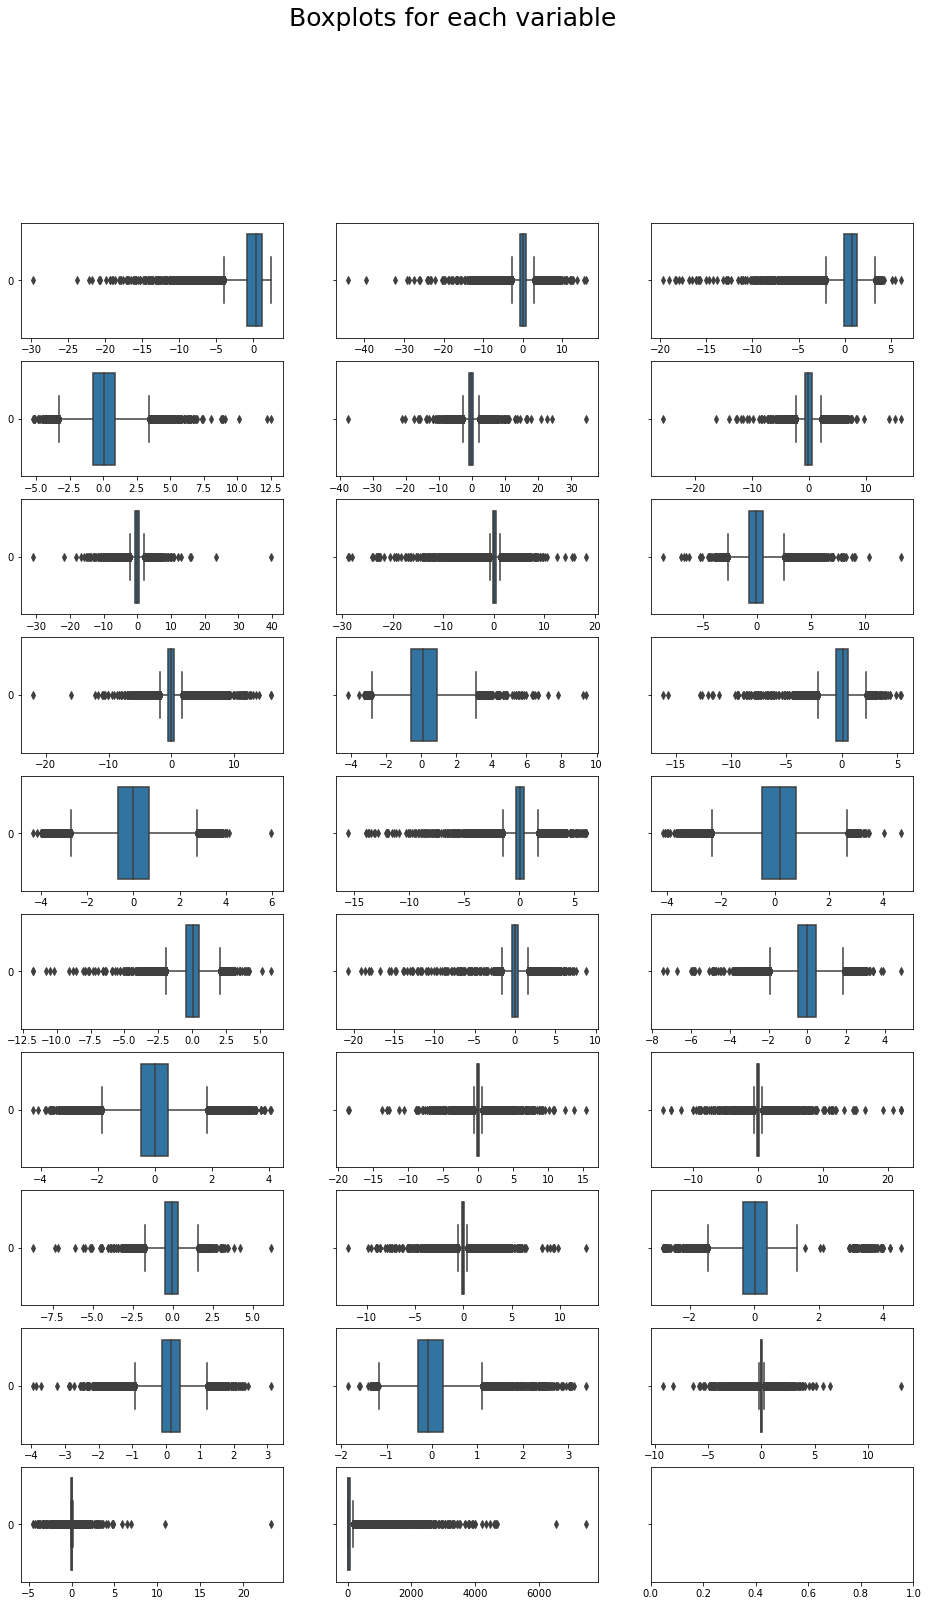

In [76]:
# Checking for outliers
num_features = list(train_data.loc[:, 'V1':'Amount'])
def boxplots_for_features(dataset, features_list, rows, cols, title):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(title, y=1, size=25)
    axs = axs.flatten()
    for i, feature in enumerate(features_list):
        sns.boxplot(data=dataset[feature], orient='h', ax=axs[i])
boxplots_for_features(dataset=train_data, features_list=num_features, rows=10, cols=3, title='Boxplots for each variable')

In [77]:
# Function for IQR method
def detect_outliers_iqr(df, n, features):
    outlier_indices = []
    for feature in features:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_indices.extend(df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index)
    outlier_indices = Counter(outlier_indices)
    return [k for k, v in outlier_indices.items() if v > n]

In [80]:
# Removing outliers
outliers = detect_outliers_iqr(train_data, 1, num_features)
train_data = train_data.drop(outliers, axis=0).reset_index(drop=True)

In [83]:
# Checking duplicated values and removing them
print(f"Number of duplicated values in dataset: {train_data.duplicated().sum()}")
train_data.drop_duplicates(inplace=True)

Number of duplicated values in dataset: 28


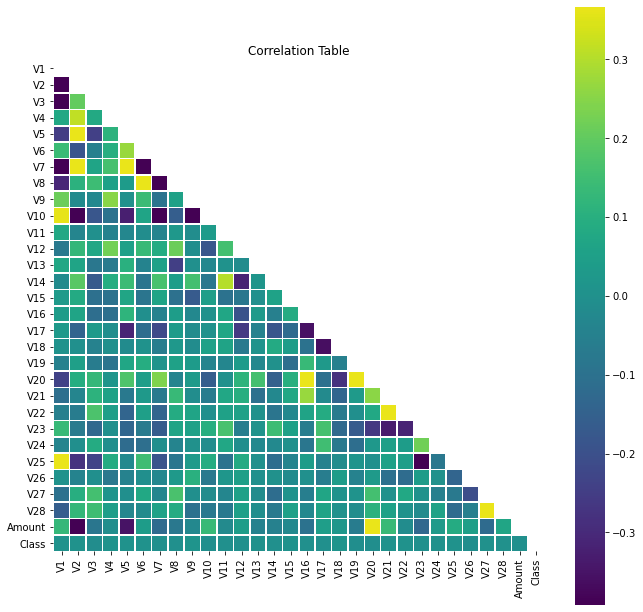

In [84]:
# Checking correlations
plt.figure(figsize = (11,11))
# Checking correlations
correlation_matrix = train_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask = mask, robust = True, center = 0, square = True, cmap="viridis", linewidths = .6)
plt.title('Correlation Table')
plt.show()

Final shape of train data: (166009, 30)


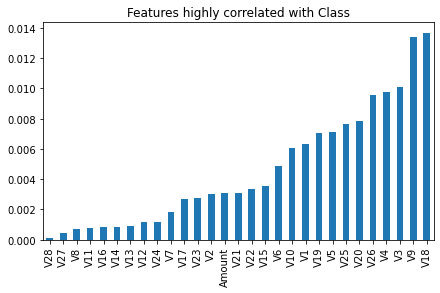

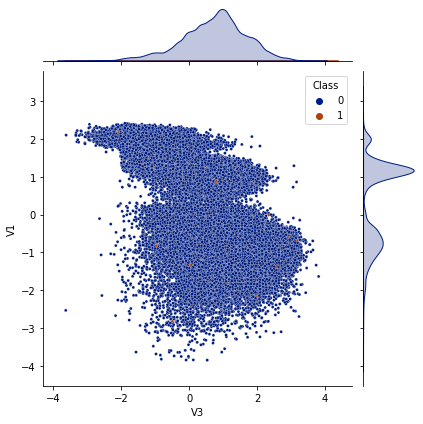

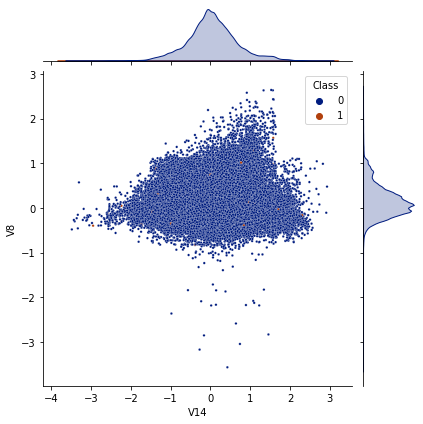

In [85]:
# Features highly correlated with 'Class'
class_corr = train_data.corr()['Class'][:-1].abs().sort_values()
plt.figure(figsize=(7,4))
class_corr.plot(kind='bar', title='Features highly correlated with Class')

# Further visualizations
sns.jointplot(x='V3', y='V1', hue='Class', data=train_data, palette='dark', s=9)
sns.jointplot(x='V14', y='V8', hue='Class', data=train_data, palette='dark', s=6)

# Final look at the training data
print(f"Final shape of train data: {train_data.shape}")

In [88]:
# Standardize the 'Amount' feature
scaler = StandardScaler()
train_data['Amount'] = scaler.fit_transform(train_data['Amount'].values.reshape(-1, 1))
test_data['Amount'] = scaler.transform(test_data['Amount'].values.reshape(-1, 1))

# Split the data into training and testing sets
X = train_data.drop('Class', axis=1)
y = train_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Making predictions
y_pred = log_reg.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33173
           1       0.00      0.00      0.00        29

    accuracy                           1.00     33202
   macro avg       0.50      0.50      0.50     33202
weighted avg       1.00      1.00      1.00     33202



/Users/nimaap/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
# Making predictions on the actual test set
test_pred = log_reg.predict(test_data)

# Preparing data for submission
submission = pd.DataFrame({
    'id': test_data.index, 
    'Class': test_pred
})

# Writing data to CSV for submission
submission.to_csv('submission.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier
rfc = RandomForestClassifier()

# Train the model using the training sets
rfc.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rfc = rfc.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred_rfc))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Train the model using the training sets
gbc.fit(X_train, y_train)

# Predicting the Test set results
y_pred_gbc = gbc.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred_gbc))

In [ ]:
import xgboost as xgb

# Create an XGBoost classifier
xgbc = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model using the training sets
xgbc.fit(X_train, y_train)

# Predicting the Test set results
y_pred_xgbc = xgbc.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred_xgbc))